In [150]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder
import gc
import os
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import time
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

In [270]:
df_train = pd.read_hdf('Elo_fe.h5', 'df_train')
df_test = pd.read_hdf('Elo_fe.h5', 'df_test')
target = pd.read_hdf('Elo_fe.h5', 'target')

In [272]:
df_train

,first_active_month,card_id,feature_1,feature_2,feature_3,hist_subsector_id_nunique,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_month_nunique,hist_month_sum,hist_month_mean,hist_month_var,hist_month_median,hist_hour_nunique,hist_hour_sum,hist_hour_mean,hist_hour_var,hist_hour_median,hist_weekofyear_nunique,hist_weekofyear_sum,hist_weekofyear_mean,hist_weekofyear_var,hist_weekofyear_median,hist_dayofweek_nunique,hist_dayofweek_sum,hist_dayofweek_mean,hist_dayofweek_var,hist_dayofweek_median,hist_year_nunique,hist_year_sum,hist_year_mean,hist_year_var,hist_year_median,hist_purchase_amount_sum,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_mean,hist_purchase_amount_var,hist_purchase_amount_median,hist_installments_sum,hist_installments_max,hist_installments_min,hist_installments_mean,hist_installments_var,hist_installments_median,hist_purchase_date_max,hist_purchase_date_min,hist_month_lag_max,hist_month_lag_min,hist_month_lag_mean,hist_month_lag_var,hist_month_lag_median,hist_month_diff_mean,hist_month_diff_median,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_weekend_sum,hist_weekend_mean,hist_category_1_sum,hist_category_1_mean,hist_card_id_size,hist_category_2_mean_mean,hist_category_3_mean_mean,hist_purchase_date_diff,hist_purchase_date_average,hist_purchase_date_uptonow,new_hist_subsector_id_nunique,new_hist_merchant_id_nunique,new_hist_merchant_category_id_nunique,new_hist_month_nunique,new_hist_month_sum,new_hist_month_mean,new_hist_month_var,new_hist_month_median,new_hist_hour_nunique,new_hist_hour_sum,new_hist_hour_mean,new_hist_hour_var,new_hist_hour_median,new_hist_weekofyear_nunique,new_hist_weekofyear_sum,new_hist_weekofyear_mean,new_hist_weekofyear_var,new_hist_weekofyear_median,new_hist_dayofweek_nunique,new_hist_dayofweek_sum,new_hist_dayofweek_mean,new_hist_dayofweek_var,new_hist_dayofweek_median,new_hist_year_nunique,new_hist_year_sum,new_hist_year_mean,new_hist_year_var,new_hist_year_median,new_hist_purchase_amount_sum,new_hist_purchase_amount_max,new_hist_purchase_amount_min,new_hist_purchase_amount_mean,new_hist_purchase_amount_var,new_hist_purchase_amount_median,new_hist_installments_sum,new_hist_installments_max,new_hist_installments_min,new_hist_installments_mean,new_hist_installments_var,new_hist_installments_median,new_hist_purchase_date_max,new_hist_purchase_date_min,new_hist_month_lag_max,new_hist_month_lag_min,new_hist_month_lag_mean,new_hist_month_lag_var,new_hist_month_lag_median,new_hist_month_diff_mean,new_hist_month_diff_median,new_hist_authorized_flag_sum,new_hist_authorized_flag_mean,new_hist_weekend_sum,new_hist_weekend_mean,new_hist_category_1_sum,new_hist_category_1_mean,new_hist_card_id_size,new_hist_category_2_mean_mean,new_hist_category_3_mean_mean,new_hist_purchase_date_diff,new_hist_purchase_date_average,new_hist_purchase_date_uptonow,sum_features,sumofsquare_features,dot_features,outliers,dayofweek,weekofyear,month,elapsed_time,hist_first_buy,new_hist_first_buy,card_id_total,purchase_amount_total
0,2017-06-01,C_ID_92a2005557,0.013145,0.008752,0.011428,21,94,41,9,2095,8.057692,12.070018,8.0,23,3462,13.315385,24.687793,14.0,35,8599,33.073077,231.033249,34.0,7,835,3.211538,3.912608,3.0,2,524464,2017.169231,0.141135,2017.0,-165.968739,2.258395,-0.739395,-0.638341,0.045003,-0.698042,4,1,0,0.015385,0.015206,0.0,1.519551e+09,1.498573e+09,0,-8,-3.911538,5.748901,-4.0,10.757692,11.0,247,0.950000,90,0.346154,0,0.000000,260,0.072502,0.346719,242,0.930769,326,10.0,23.0,14.0,2.0,80.0,3.478261,0.260870,3.0,8.0,296.0,12.869565,4.209486,13.0,7.0,306.0,13.304348,5.312253,13.0,7.0,72.0,3.130435,4.118577,4.0,1.0,46414.0,2018.0,0.0,2018.0,-13.244202,-0.296112,-0.724368,-0.575835,0.018445,-0.581180,0.0,0.0,0.0,0.000000,0.000000,0.0,1.525001e+09,1.520259e+09,2.0,1.0,1.478261,0.260870,1.0,10.695652,11.0,23.0,1.0,6.0,0.260870,0.0,0.000000,23.0,-0.550160,-0.592993,54.0,2.347826,263.0,8,30,10,0,3,22,6,595,26,277.0,283.0,-179.212942
1,2017-01-01,C_ID_3d004492

In [271]:
binary_target = df_train['outliers']

In [30]:
np.random.seed(0) 

# binary_target=1: target=-33.219...

random_indices = np.random.choice(binary_target[binary_target==0].index, 
                                  len(binary_target[binary_target==1]),
                                  replace=False,
                                  )
balanced_indices = np.concatenate([random_indices, binary_target[binary_target==1].index])

np.random.seed(0)
np.random.shuffle(balanced_indices)

df_train = df_train.iloc[balanced_indices,:]
binary_target = binary_target[balanced_indices]

x0, x1, y0, y1 = train_test_split(df_train.drop(['outliers','first_active_month', 'card_id'], axis=1), 
                                  binary_target, test_size=0.33, random_state=42)


In [33]:
best_params = {
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'n_estimators': 2000,
 'num_leaves': 32,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 1.2,
 'reg_lambda': 1.6,
 'subsample': 0.7}

clf = lgb.LGBMClassifier(**best_params)
clf.fit(x0, y0,
        eval_set=[(x1, y1)],
        eval_metric='l1',
        early_stopping_rounds=10)

predict = clf.predict(x1)
confusion_matrix(y1,predict)

[1]	valid_0's binary_logloss: 0.689043	valid_0's l1: 0.497904
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.684747	valid_0's l1: 0.495722
[3]	valid_0's binary_logloss: 0.680459	valid_0's l1: 0.493522
[4]	valid_0's binary_logloss: 0.6763	valid_0's l1: 0.491367
[5]	valid_0's binary_logloss: 0.672131	valid_0's l1: 0.489192
[6]	valid_0's binary_logloss: 0.668123	valid_0's l1: 0.487075
[7]	valid_0's binary_logloss: 0.664162	valid_0's l1: 0.484973
[8]	valid_0's binary_logloss: 0.660404	valid_0's l1: 0.482953
[9]	valid_0's binary_logloss: 0.656582	valid_0's l1: 0.480878
[10]	valid_0's binary_logloss: 0.652957	valid_0's l1: 0.478889
[11]	valid_0's binary_logloss: 0.64912	valid_0's l1: 0.476784
[12]	valid_0's binary_logloss: 0.645598	valid_0's l1: 0.474828
[13]	valid_0's binary_logloss: 0.642179	valid_0's l1: 0.472897
[14]	valid_0's binary_logloss: 0.638602	valid_0's l1: 0.470882
[15]	valid_0's binary_logloss: 0.635244	valid_0's l1: 0.46896
[16]	v

[131]	valid_0's binary_logloss: 0.454403	valid_0's l1: 0.330954
[132]	valid_0's binary_logloss: 0.453724	valid_0's l1: 0.330259
[133]	valid_0's binary_logloss: 0.453043	valid_0's l1: 0.329551
[134]	valid_0's binary_logloss: 0.452548	valid_0's l1: 0.32895
[135]	valid_0's binary_logloss: 0.452009	valid_0's l1: 0.328321
[136]	valid_0's binary_logloss: 0.451519	valid_0's l1: 0.327717
[137]	valid_0's binary_logloss: 0.450994	valid_0's l1: 0.327113
[138]	valid_0's binary_logloss: 0.450536	valid_0's l1: 0.326527
[139]	valid_0's binary_logloss: 0.449997	valid_0's l1: 0.325908
[140]	valid_0's binary_logloss: 0.449451	valid_0's l1: 0.325279
[141]	valid_0's binary_logloss: 0.448837	valid_0's l1: 0.324634
[142]	valid_0's binary_logloss: 0.448375	valid_0's l1: 0.324044
[143]	valid_0's binary_logloss: 0.447908	valid_0's l1: 0.323448
[144]	valid_0's binary_logloss: 0.447415	valid_0's l1: 0.322894
[145]	valid_0's binary_logloss: 0.446876	valid_0's l1: 0.322286
[146]	valid_0's binary_logloss: 0.446477	

[260]	valid_0's binary_logloss: 0.418116	valid_0's l1: 0.279402
[261]	valid_0's binary_logloss: 0.418053	valid_0's l1: 0.279183
[262]	valid_0's binary_logloss: 0.417916	valid_0's l1: 0.278936
[263]	valid_0's binary_logloss: 0.417726	valid_0's l1: 0.278682
[264]	valid_0's binary_logloss: 0.417653	valid_0's l1: 0.278466
[265]	valid_0's binary_logloss: 0.417621	valid_0's l1: 0.278278
[266]	valid_0's binary_logloss: 0.417564	valid_0's l1: 0.278095
[267]	valid_0's binary_logloss: 0.417498	valid_0's l1: 0.277879
[268]	valid_0's binary_logloss: 0.417374	valid_0's l1: 0.277642
[269]	valid_0's binary_logloss: 0.41726	valid_0's l1: 0.27742
[270]	valid_0's binary_logloss: 0.41716	valid_0's l1: 0.277215
[271]	valid_0's binary_logloss: 0.417129	valid_0's l1: 0.277007
[272]	valid_0's binary_logloss: 0.416944	valid_0's l1: 0.27677
[273]	valid_0's binary_logloss: 0.416862	valid_0's l1: 0.276569
[274]	valid_0's binary_logloss: 0.416758	valid_0's l1: 0.276341
[275]	valid_0's binary_logloss: 0.41663	vali

[402]	valid_0's binary_logloss: 0.408103	valid_0's l1: 0.258719
[403]	valid_0's binary_logloss: 0.408069	valid_0's l1: 0.258643
[404]	valid_0's binary_logloss: 0.408025	valid_0's l1: 0.25856
[405]	valid_0's binary_logloss: 0.407948	valid_0's l1: 0.258481
[406]	valid_0's binary_logloss: 0.407931	valid_0's l1: 0.258451
[407]	valid_0's binary_logloss: 0.407864	valid_0's l1: 0.258339
[408]	valid_0's binary_logloss: 0.40782	valid_0's l1: 0.258235
[409]	valid_0's binary_logloss: 0.407734	valid_0's l1: 0.258143
[410]	valid_0's binary_logloss: 0.407746	valid_0's l1: 0.258059
[411]	valid_0's binary_logloss: 0.407812	valid_0's l1: 0.257991
[412]	valid_0's binary_logloss: 0.407758	valid_0's l1: 0.257907
[413]	valid_0's binary_logloss: 0.407743	valid_0's l1: 0.257814
[414]	valid_0's binary_logloss: 0.407774	valid_0's l1: 0.257748
[415]	valid_0's binary_logloss: 0.407729	valid_0's l1: 0.257663
[416]	valid_0's binary_logloss: 0.407664	valid_0's l1: 0.257568
[417]	valid_0's binary_logloss: 0.407613	v

array([[592, 153],
       [110, 602]])

In [44]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3,
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_logloss'}

gridParams = {
    'learning_rate': [0.01,0.015],
    'n_estimators': [200],
    'num_leaves': [63,127],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.8],
    'subsample' : [0.9],
    'reg_alpha' : [0.9,1],
    'reg_lambda' : [1,1.6],
    'num_boost_round': [500],
    'feature_fraction': [0.7,0.6],
    'bagging_fraction': [0.7,0.6],
    }

mdl = lgb.LGBMClassifier(
          boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = -1, 
          silent = False,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'],
        )

In [45]:
grid = GridSearchCV(mdl, gridParams, verbose=3,
                    cv=10, n_jobs=-1)

grid.fit(df_train.drop(['outliers','first_active_month', 'card_id'], axis=1), 
                                  binary_target)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.5s
/Users/jincui/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.8min finished
/Users/jincui/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_bin=512,
        max_depth=-1, min_child_samples=5, min_child_weight=1,
        min_split_gain=0.5, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, scale_pos_weight=1, silent=False, subsample=1,
        subsample_for_bin=200, subsample_freq=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.015], 'n_estimators': [200], 'num_leaves': [63, 127], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [501], 'colsample_bytree': [0.8], 'subsample': [0.9], 'reg_alpha': [0.9, 1], 'reg_lambda': [1, 1.6], 'num_boost_round': [500], 'feature_fraction': [0.7, 0.6], 'bagging_fraction': [0.7, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [68]:
x0, x1, y0, y1 = train_test_split(df_train.drop(['outliers','first_active_month', 'card_id'], axis=1), 
                                  binary_target, test_size=0.33, random_state=42)

clf = lgb.LGBMClassifier(**grid.best_params_)
clf.fit(x0, y0,
        eval_set=[(x1, y1)],
        eval_metric='l1',
        )

predict = clf.predict(x1)
confusion_matrix(y1,predict)

/Users/jincui/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.689031	valid_0's l1: 0.497898
[2]	valid_0's binary_logloss: 0.68472	valid_0's l1: 0.495709
[3]	valid_0's binary_logloss: 0.680677	valid_0's l1: 0.493636
[4]	valid_0's binary_logloss: 0.676357	valid_0's l1: 0.491403
[5]	valid_0's binary_logloss: 0.672227	valid_0's l1: 0.489249
[6]	valid_0's binary_logloss: 0.668106	valid_0's l1: 0.487077
[7]	valid_0's binary_logloss: 0.66418	valid_0's l1: 0.48499
[8]	valid_0's binary_logloss: 0.660206	valid_0's l1: 0.482866
[9]	valid_0's binary_logloss: 0.656445	valid_0's l1: 0.480826
[10]	valid_0's binary_logloss: 0.652847	valid_0's l1: 0.478856
[11]	valid_0's binary_logloss: 0.649175	valid_0's l1: 0.476831
[12]	valid_0's binary_logloss: 0.645691	valid_0's l1: 0.474891
[13]	valid_0's binary_logloss: 0.642223	valid_0's l1: 0.472944
[14]	valid_0's binary_logloss: 0.638626	valid_0's l1: 0.47092
[15]	valid_0's binary_logloss: 0.635154	valid_0's l1: 0.46894
[16]	valid_0's binary_logloss: 0.631807	valid_0's l1: 0.467024
[17]	v

[139]	valid_0's binary_logloss: 0.449796	valid_0's l1: 0.32572
[140]	valid_0's binary_logloss: 0.449259	valid_0's l1: 0.325075
[141]	valid_0's binary_logloss: 0.448757	valid_0's l1: 0.324499
[142]	valid_0's binary_logloss: 0.448262	valid_0's l1: 0.323901
[143]	valid_0's binary_logloss: 0.447734	valid_0's l1: 0.323298
[144]	valid_0's binary_logloss: 0.4473	valid_0's l1: 0.322741
[145]	valid_0's binary_logloss: 0.446826	valid_0's l1: 0.32215
[146]	valid_0's binary_logloss: 0.446349	valid_0's l1: 0.321577
[147]	valid_0's binary_logloss: 0.445849	valid_0's l1: 0.320999
[148]	valid_0's binary_logloss: 0.445324	valid_0's l1: 0.32039
[149]	valid_0's binary_logloss: 0.444824	valid_0's l1: 0.319803
[150]	valid_0's binary_logloss: 0.444316	valid_0's l1: 0.319218
[151]	valid_0's binary_logloss: 0.443904	valid_0's l1: 0.318685
[152]	valid_0's binary_logloss: 0.443465	valid_0's l1: 0.318111
[153]	valid_0's binary_logloss: 0.443018	valid_0's l1: 0.317544
[154]	valid_0's binary_logloss: 0.442643	vali

[274]	valid_0's binary_logloss: 0.416714	valid_0's l1: 0.273632
[275]	valid_0's binary_logloss: 0.416639	valid_0's l1: 0.273401
[276]	valid_0's binary_logloss: 0.416521	valid_0's l1: 0.273161
[277]	valid_0's binary_logloss: 0.416479	valid_0's l1: 0.272992
[278]	valid_0's binary_logloss: 0.41627	valid_0's l1: 0.272729
[279]	valid_0's binary_logloss: 0.416144	valid_0's l1: 0.272508
[280]	valid_0's binary_logloss: 0.416098	valid_0's l1: 0.272301
[281]	valid_0's binary_logloss: 0.416015	valid_0's l1: 0.272063
[282]	valid_0's binary_logloss: 0.415889	valid_0's l1: 0.271822
[283]	valid_0's binary_logloss: 0.415742	valid_0's l1: 0.271591
[284]	valid_0's binary_logloss: 0.415701	valid_0's l1: 0.271384
[285]	valid_0's binary_logloss: 0.415647	valid_0's l1: 0.271151
[286]	valid_0's binary_logloss: 0.415695	valid_0's l1: 0.270981
[287]	valid_0's binary_logloss: 0.415628	valid_0's l1: 0.270762
[288]	valid_0's binary_logloss: 0.415581	valid_0's l1: 0.270572
[289]	valid_0's binary_logloss: 0.415571	

[406]	valid_0's binary_logloss: 0.411813	valid_0's l1: 0.253328
[407]	valid_0's binary_logloss: 0.411805	valid_0's l1: 0.253212
[408]	valid_0's binary_logloss: 0.41182	valid_0's l1: 0.253129
[409]	valid_0's binary_logloss: 0.411694	valid_0's l1: 0.252997
[410]	valid_0's binary_logloss: 0.411681	valid_0's l1: 0.252889
[411]	valid_0's binary_logloss: 0.411616	valid_0's l1: 0.252776
[412]	valid_0's binary_logloss: 0.411622	valid_0's l1: 0.252677
[413]	valid_0's binary_logloss: 0.411588	valid_0's l1: 0.252575
[414]	valid_0's binary_logloss: 0.411584	valid_0's l1: 0.252486
[415]	valid_0's binary_logloss: 0.41155	valid_0's l1: 0.252379
[416]	valid_0's binary_logloss: 0.411479	valid_0's l1: 0.252282
[417]	valid_0's binary_logloss: 0.411501	valid_0's l1: 0.252225
[418]	valid_0's binary_logloss: 0.411553	valid_0's l1: 0.252133
[419]	valid_0's binary_logloss: 0.411603	valid_0's l1: 0.252042
[420]	valid_0's binary_logloss: 0.411583	valid_0's l1: 0.251979
[421]	valid_0's binary_logloss: 0.411527	v

array([[589, 156],
       [108, 604]])

In [73]:
## the model must have overestimated the number of outliers
test_predict = clf.predict(df_test.drop(['first_active_month', 'card_id'], axis=1))
Counter(test_predict)

Counter({1: 25551, 0: 98072})

In [108]:
# should have ~1351 outliers in the test dataset
ratio = len(target[target<-30])/len(target)
ratio * len(df_test)

1351.2282819178176

In [77]:
test_proba = clf.predict_proba(df_test.drop(['first_active_month', 'card_id'], axis=1))
test_proba = pd.DataFrame(test_proba)

In [128]:
## outliers
outlier_ind = test_proba[test_proba[1]>= 0.955].index
outlier_ind

Int64Index([    38,     72,    161,    170,    186,    370,    409,    496,
               514,    544,
            ...
            122425, 122490, 122519, 122822, 122918, 123015, 123034, 123160,
            123201, 123390],
           dtype='int64', length=1261)

In [170]:
## watch out df are re-indexed
df_train_s = df_train[target > -30]
target_s = target[target > -30]
df_test_s = df_test.drop(outlier_ind)

In [174]:
# original, 5 fold cv
def KFoldscore(param):

    folds = KFold(n_splits=5, shuffle=True, random_state=1)
    oof = np.zeros(len(df_train_s))
    predictions = np.zeros(len(df_test_s))
    feature_importance_df = pd.DataFrame()
    df_train_columns = [c for c in df_train_s.columns if c not in ['card_id', 'first_active_month','target','outliers']]



    for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_s, target_s.values)):
        print("fold {}".format(fold_))
        trn_data = lgb.Dataset(df_train_s.iloc[trn_idx][df_train_columns], label=target_s.iloc[trn_idx])#, categorical_feature=categorical_feats)
        val_data = lgb.Dataset(df_train_s.iloc[val_idx][df_train_columns], label=target_s.iloc[val_idx])#, categorical_feature=categorical_feats)

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
        oof[val_idx] = clf.predict(df_train_s.iloc[val_idx][df_train_columns], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = df_train_columns
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        predictions += clf.predict(df_test_s[df_train_columns], num_iteration=clf.best_iteration) / folds.n_splits

    score = np.sqrt(mean_squared_error(oof, target_s))
    print('score: {}'.format(score))


In [173]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.6088	valid_1's rmse: 1.6028
[200]	training's rmse: 1.57684	valid_1's rmse: 1.57527
[300]	training's rmse: 1.56161	valid_1's rmse: 1.56416
[400]	training's rmse: 1.55156	valid_1's rmse: 1.55836
[500]	training's rmse: 1.54375	valid_1's rmse: 1.55457
[600]	training's rmse: 1.53732	valid_1's rmse: 1.5524
[700]	training's rmse: 1.53177	valid_1's rmse: 1.55091
[800]	training's rmse: 1.52672	valid_1's rmse: 1.54989
[900]	training's rmse: 1.522	valid_1's rmse: 1.54917
[1000]	training's rmse: 1.51756	valid_1's rmse: 1.54857
[1100]	training's rmse: 1.51333	valid_1's rmse: 1.54816
[1200]	training's rmse: 1.50926	valid_1's rmse: 1.54784
[1300]	training's rmse: 1.50542	valid_1's rmse: 1.54755
[1400]	training's rmse: 1.5017	valid_1's rmse: 1.54736
[1500]	training's rmse: 1.49796	valid_1's rmse: 1.54707
[1600]	training's rmse: 1.49426	valid_1's rmse: 1.54682
[1700]	training's rmse: 1.49064	valid_1's rmse: 1

1.5552454344769024

In [175]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.5967	valid_1's rmse: 1.59581
[200]	training's rmse: 1.55949	valid_1's rmse: 1.56846
[300]	training's rmse: 1.5401	valid_1's rmse: 1.55841
[400]	training's rmse: 1.52617	valid_1's rmse: 1.55363
[500]	training's rmse: 1.51467	valid_1's rmse: 1.55093
[600]	training's rmse: 1.50451	valid_1's rmse: 1.54917
[700]	training's rmse: 1.49529	valid_1's rmse: 1.54813
[800]	training's rmse: 1.48703	valid_1's rmse: 1.54754
[900]	training's rmse: 1.47927	valid_1's rmse: 1.54715
[1000]	training's rmse: 1.47166	valid_1's rmse: 1.54681
[1100]	training's rmse: 1.46445	valid_1's rmse: 1.54654
[1200]	training's rmse: 1.45743	valid_1's rmse: 1.54644
[1300]	training's rmse: 1.45061	valid_1's rmse: 1.54631
[1400]	training's rmse: 1.44416	valid_1's rmse: 1.54615
[1500]	training's rmse: 1.43769	valid_1's rmse: 1.54608
[1600]	training's rmse: 1.4314	valid_1's rmse: 1.54588
[1700]	training's rmse: 1.42522	valid_1's rmse

In [176]:
# learning_rate = 0.01 is better
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.02,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.55986	valid_1's rmse: 1.56809
[200]	training's rmse: 1.52655	valid_1's rmse: 1.55308
[300]	training's rmse: 1.50525	valid_1's rmse: 1.54906
[400]	training's rmse: 1.48765	valid_1's rmse: 1.54746
[500]	training's rmse: 1.47219	valid_1's rmse: 1.54661
[600]	training's rmse: 1.45805	valid_1's rmse: 1.54619
[700]	training's rmse: 1.44477	valid_1's rmse: 1.54593
[800]	training's rmse: 1.43224	valid_1's rmse: 1.54579
[900]	training's rmse: 1.41988	valid_1's rmse: 1.54539
[1000]	training's rmse: 1.40767	valid_1's rmse: 1.54536
[1100]	training's rmse: 1.3958	valid_1's rmse: 1.54546
Early stopping, best iteration is:
[1030]	training's rmse: 1.40412	valid_1's rmse: 1.5453
fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.5559	valid_1's rmse: 1.5874
[200]	training's rmse: 1.52296	valid_1's rmse: 1.57101
[300]	training's rmse: 1.50133	valid_1's rmse: 1.5662
[4

In [177]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.59698	valid_1's rmse: 1.59587
[200]	training's rmse: 1.55998	valid_1's rmse: 1.56835
[300]	training's rmse: 1.54061	valid_1's rmse: 1.55829
[400]	training's rmse: 1.52696	valid_1's rmse: 1.55343
[500]	training's rmse: 1.51555	valid_1's rmse: 1.55054
[600]	training's rmse: 1.50558	valid_1's rmse: 1.54884
[700]	training's rmse: 1.49646	valid_1's rmse: 1.54775
[800]	training's rmse: 1.48828	valid_1's rmse: 1.54722
[900]	training's rmse: 1.48051	valid_1's rmse: 1.54677
[1000]	training's rmse: 1.47302	valid_1's rmse: 1.54643
[1100]	training's rmse: 1.46594	valid_1's rmse: 1.5461
[1200]	training's rmse: 1.45898	valid_1's rmse: 1.54596
[1300]	training's rmse: 1.45222	valid_1's rmse: 1.54584
[1400]	training's rmse: 1.44579	valid_1's rmse: 1.54569
[1500]	training's rmse: 1.43943	valid_1's rmse: 1.54557
[1600]	training's rmse: 1.43317	valid_1's rmse: 1.5454
[1700]	training's rmse: 1.42699	valid_1's rms

In [178]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.59746	valid_1's rmse: 1.59607
[200]	training's rmse: 1.56053	valid_1's rmse: 1.5685
[300]	training's rmse: 1.54129	valid_1's rmse: 1.5582
[400]	training's rmse: 1.52761	valid_1's rmse: 1.55323
[500]	training's rmse: 1.51618	valid_1's rmse: 1.55014
[600]	training's rmse: 1.50632	valid_1's rmse: 1.54841
[700]	training's rmse: 1.49737	valid_1's rmse: 1.54735
[800]	training's rmse: 1.48922	valid_1's rmse: 1.54683
[900]	training's rmse: 1.48149	valid_1's rmse: 1.54631
[1000]	training's rmse: 1.47408	valid_1's rmse: 1.54582
[1100]	training's rmse: 1.46707	valid_1's rmse: 1.54556
[1200]	training's rmse: 1.46018	valid_1's rmse: 1.5453
[1300]	training's rmse: 1.45354	valid_1's rmse: 1.54522
[1400]	training's rmse: 1.4471	valid_1's rmse: 1.54517
[1500]	training's rmse: 1.44079	valid_1's rmse: 1.54499
[1600]	training's rmse: 1.43456	valid_1's rmse: 1.5448
[1700]	training's rmse: 1.42852	valid_1's rmse: 

In [179]:
# feature_fraction = 0.7 is better
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.6,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.59783	valid_1's rmse: 1.59649
[200]	training's rmse: 1.56103	valid_1's rmse: 1.56879
[300]	training's rmse: 1.54198	valid_1's rmse: 1.55854
[400]	training's rmse: 1.52846	valid_1's rmse: 1.55371
[500]	training's rmse: 1.51721	valid_1's rmse: 1.55081
[600]	training's rmse: 1.50738	valid_1's rmse: 1.5491
[700]	training's rmse: 1.49859	valid_1's rmse: 1.54798
[800]	training's rmse: 1.49046	valid_1's rmse: 1.54725
[900]	training's rmse: 1.48282	valid_1's rmse: 1.54682
[1000]	training's rmse: 1.47566	valid_1's rmse: 1.54658
[1100]	training's rmse: 1.46881	valid_1's rmse: 1.54633
[1200]	training's rmse: 1.46212	valid_1's rmse: 1.54612
[1300]	training's rmse: 1.45552	valid_1's rmse: 1.54594
[1400]	training's rmse: 1.44916	valid_1's rmse: 1.54587
[1500]	training's rmse: 1.44301	valid_1's rmse: 1.54565
[1600]	training's rmse: 1.43698	valid_1's rmse: 1.54563
[1700]	training's rmse: 1.43094	valid_1's rm

In [180]:
# trying a smaller learning rate
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.007,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.61829	valid_1's rmse: 1.61416
[200]	training's rmse: 1.57863	valid_1's rmse: 1.58144
[300]	training's rmse: 1.5581	valid_1's rmse: 1.56746
[400]	training's rmse: 1.54442	valid_1's rmse: 1.56016
[500]	training's rmse: 1.53395	valid_1's rmse: 1.55571
[600]	training's rmse: 1.52508	valid_1's rmse: 1.55288
[700]	training's rmse: 1.51726	valid_1's rmse: 1.55094
[800]	training's rmse: 1.5101	valid_1's rmse: 1.54958
[900]	training's rmse: 1.50346	valid_1's rmse: 1.54857
[1000]	training's rmse: 1.49727	valid_1's rmse: 1.54786
[1100]	training's rmse: 1.49143	valid_1's rmse: 1.54739
[1200]	training's rmse: 1.48587	valid_1's rmse: 1.54694
[1300]	training's rmse: 1.48051	valid_1's rmse: 1.54666
[1400]	training's rmse: 1.47543	valid_1's rmse: 1.54636
[1500]	training's rmse: 1.47046	valid_1's rmse: 1.54611
[1600]	training's rmse: 1.4657	valid_1's rmse: 1.54589
[1700]	training's rmse: 1.46094	valid_1's rmse

In [181]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}
KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.6377	valid_1's rmse: 1.6315
[200]	training's rmse: 1.59745	valid_1's rmse: 1.59641
[300]	training's rmse: 1.57506	valid_1's rmse: 1.57866
[400]	training's rmse: 1.56056	valid_1's rmse: 1.56884
[500]	training's rmse: 1.54983	valid_1's rmse: 1.56253
[600]	training's rmse: 1.54125	valid_1's rmse: 1.5584
[700]	training's rmse: 1.53407	valid_1's rmse: 1.55552
[800]	training's rmse: 1.52766	valid_1's rmse: 1.55329
[900]	training's rmse: 1.52173	valid_1's rmse: 1.55158
[1000]	training's rmse: 1.51625	valid_1's rmse: 1.55029
[1100]	training's rmse: 1.51112	valid_1's rmse: 1.54928
[1200]	training's rmse: 1.50626	valid_1's rmse: 1.5485
[1300]	training's rmse: 1.50172	valid_1's rmse: 1.54793
[1400]	training's rmse: 1.49735	valid_1's rmse: 1.54743
[1500]	training's rmse: 1.49316	valid_1's rmse: 1.547
[1600]	training's rmse: 1.48915	valid_1's rmse: 1.54664
[1700]	training's rmse: 1.48519	valid_1's rmse: 1

[900]	training's rmse: 1.51938	valid_1's rmse: 1.56116
[1000]	training's rmse: 1.51387	valid_1's rmse: 1.56011
[1100]	training's rmse: 1.50873	valid_1's rmse: 1.55925
[1200]	training's rmse: 1.50387	valid_1's rmse: 1.55863
[1300]	training's rmse: 1.49923	valid_1's rmse: 1.55817
[1400]	training's rmse: 1.49483	valid_1's rmse: 1.55778
[1500]	training's rmse: 1.49057	valid_1's rmse: 1.55745
[1600]	training's rmse: 1.48653	valid_1's rmse: 1.55719
[1700]	training's rmse: 1.48267	valid_1's rmse: 1.55703
[1800]	training's rmse: 1.47883	valid_1's rmse: 1.55689
[1900]	training's rmse: 1.4751	valid_1's rmse: 1.55679
[2000]	training's rmse: 1.47151	valid_1's rmse: 1.55665
[2100]	training's rmse: 1.46797	valid_1's rmse: 1.55649
[2200]	training's rmse: 1.46451	valid_1's rmse: 1.5564
[2300]	training's rmse: 1.46105	valid_1's rmse: 1.55635
[2400]	training's rmse: 1.45762	valid_1's rmse: 1.55629
[2500]	training's rmse: 1.45432	valid_1's rmse: 1.55627
[2600]	training's rmse: 1.45109	valid_1's rmse: 1.5

In [221]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}

nfolds = 10
folds = KFold(n_splits= nfolds, shuffle=True, random_state=1)

feature_importance_df = np.zeros((df_train_s.shape[1], nfolds))
mvalid = np.zeros(len(df_train_s))
mfull = np.zeros(len(df_test_s))
df_train_columns = [c for c in df_train_s.columns if c not in ['card_id', 'first_active_month','target','outliers']]


for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_s, target_s.values)):
    print('----')
    print("fold n°{}".format(fold_))
    
    x0,y0 = df_train_s.iloc[trn_idx][df_train_columns], target_s[trn_idx]
    x1,y1 = df_train_s.iloc[val_idx][df_train_columns], target_s[val_idx]
    
    trn_data = lgb.Dataset(x0, label= y0); val_data = lgb.Dataset(x1, label= y1)
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    
    mvalid[val_idx] = clf.predict(x1, num_iteration=clf.best_iteration)
    
    feature_importance_df[:, fold_] = clf.feature_importance()
    
    mfull += clf.predict(df_test_s.drop(['first_active_month', 'card_id'], axis=1), 
                         num_iteration=clf.best_iteration) / folds.n_splits
    

----
fold n°0
Training until validation scores don't improve for 100 rounds.


TypeError: 'NoneType' object is not iterable

In [223]:
## modified 10 fold
def KFoldscore(param):

    folds = KFold(n_splits=10, shuffle=True, random_state=1)
    oof = np.zeros(len(df_train_s))
    predictions = np.zeros(len(df_test_s))
    feature_importance_df = pd.DataFrame()
    df_train_columns = [c for c in df_train_s.columns if c not in ['card_id', 'first_active_month','target','outliers']]
    mfull = np.zeros(len(df_test_s))


    for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_s, target_s.values)):
        print("fold {}".format(fold_))
        trn_data = lgb.Dataset(df_train_s.iloc[trn_idx][df_train_columns], label=target_s.iloc[trn_idx])#, categorical_feature=categorical_feats)
        val_data = lgb.Dataset(df_train_s.iloc[val_idx][df_train_columns], label=target_s.iloc[val_idx])#, categorical_feature=categorical_feats)

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
        oof[val_idx] = clf.predict(df_train_s.iloc[val_idx][df_train_columns], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = df_train_columns
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        predictions += clf.predict(df_test_s[df_train_columns], num_iteration=clf.best_iteration) / folds.n_splits
        mfull += clf.predict(df_test_s.drop(['first_active_month', 'card_id'], axis=1), 
                             num_iteration=clf.best_iteration) / folds.n_splits
    
        
    score = np.sqrt(mean_squared_error(oof, target_s))
    print('score: {}'.format(score))
    return mfull


In [224]:
param = {'num_leaves': 63,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 1}

test_pred = KFoldscore(param)

fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.63631	valid_1's rmse: 1.64162
[200]	training's rmse: 1.59654	valid_1's rmse: 1.60563
[300]	training's rmse: 1.57462	valid_1's rmse: 1.58713
[400]	training's rmse: 1.56063	valid_1's rmse: 1.57662
[500]	training's rmse: 1.55037	valid_1's rmse: 1.57
[600]	training's rmse: 1.54221	valid_1's rmse: 1.56556
[700]	training's rmse: 1.53548	valid_1's rmse: 1.5623
[800]	training's rmse: 1.52945	valid_1's rmse: 1.55988
[900]	training's rmse: 1.52391	valid_1's rmse: 1.55797
[1000]	training's rmse: 1.51882	valid_1's rmse: 1.55658
[1100]	training's rmse: 1.51413	valid_1's rmse: 1.55547
[1200]	training's rmse: 1.50974	valid_1's rmse: 1.55464
[1300]	training's rmse: 1.50552	valid_1's rmse: 1.55396
[1400]	training's rmse: 1.50145	valid_1's rmse: 1.55344
[1500]	training's rmse: 1.49761	valid_1's rmse: 1.55295
[1600]	training's rmse: 1.49394	valid_1's rmse: 1.55249
[1700]	training's rmse: 1.49033	valid_1's rmse:

[1600]	training's rmse: 1.49092	valid_1's rmse: 1.58377
[1700]	training's rmse: 1.48738	valid_1's rmse: 1.5835
[1800]	training's rmse: 1.48393	valid_1's rmse: 1.5833
[1900]	training's rmse: 1.48058	valid_1's rmse: 1.58318
[2000]	training's rmse: 1.47734	valid_1's rmse: 1.58309
[2100]	training's rmse: 1.47412	valid_1's rmse: 1.58295
[2200]	training's rmse: 1.47095	valid_1's rmse: 1.58283
[2300]	training's rmse: 1.46783	valid_1's rmse: 1.5828
[2400]	training's rmse: 1.46475	valid_1's rmse: 1.58275
[2500]	training's rmse: 1.46177	valid_1's rmse: 1.58272
[2600]	training's rmse: 1.45882	valid_1's rmse: 1.58267
[2700]	training's rmse: 1.45583	valid_1's rmse: 1.58259
Early stopping, best iteration is:
[2679]	training's rmse: 1.45645	valid_1's rmse: 1.58255
fold 5
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.63766	valid_1's rmse: 1.62806
[200]	training's rmse: 1.59768	valid_1's rmse: 1.59374
[300]	training's rmse: 1.57553	valid_1's rmse: 1.5768
[400]	

[1900]	training's rmse: 1.48125	valid_1's rmse: 1.57538
[2000]	training's rmse: 1.47797	valid_1's rmse: 1.5752
[2100]	training's rmse: 1.47472	valid_1's rmse: 1.57514
[2200]	training's rmse: 1.47148	valid_1's rmse: 1.57499
[2300]	training's rmse: 1.46835	valid_1's rmse: 1.57488
[2400]	training's rmse: 1.46525	valid_1's rmse: 1.5748
[2500]	training's rmse: 1.46223	valid_1's rmse: 1.5747
[2600]	training's rmse: 1.45918	valid_1's rmse: 1.57464
[2700]	training's rmse: 1.45614	valid_1's rmse: 1.57458
[2800]	training's rmse: 1.45319	valid_1's rmse: 1.57452
[2900]	training's rmse: 1.45027	valid_1's rmse: 1.57444
[3000]	training's rmse: 1.44747	valid_1's rmse: 1.57439
[3100]	training's rmse: 1.44463	valid_1's rmse: 1.57433
[3200]	training's rmse: 1.4418	valid_1's rmse: 1.57423
[3300]	training's rmse: 1.43892	valid_1's rmse: 1.57422
[3400]	training's rmse: 1.4361	valid_1's rmse: 1.57419
Early stopping, best iteration is:
[3361]	training's rmse: 1.4372	valid_1's rmse: 1.57416
score: 1.5537663207

In [230]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="Feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

/Users/jincui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [226]:
test_pred.shape

(122362,)

In [231]:
target_s.shape

(199710,)

/Users/jincui/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


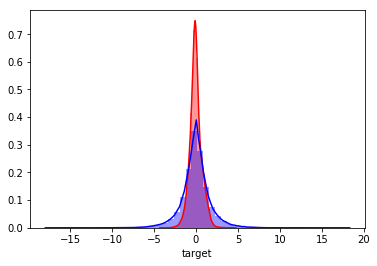

In [232]:
sns.distplot(test_pred, color='r')
sns.distplot(target_s, color='b')

In [242]:
test_pred.shape

(122362,)

In [246]:
xsub = pd.DataFrame()
xsub['card_id']  = df_test_s['card_id']
xsub['target'] = test_pred
xsub

,card_id,target
0,C_ID_0ab67a22ab,-0.554555
1,C_ID_130fd0cbdd,-0.280709
2,C_ID_b709037bc5,-0.487993
3,C_ID_d27d835a9f,-0.074755
4,C_ID_2b5e3df5c2,-1.529268
5,C_ID_5814b4f13c,0.552645
6,C_ID_a1b3c75277,0.069335
7,C_ID_f7cada36d3,0.881863
8,C_ID_9d2bc8dfc4,-0.891670
9,C_ID_6d8dba8475,-0.269967


In [255]:
xsub_b = pd.DataFrame()
xsub_b['card_id'] = df_test.iloc[outlier_ind,:]['card_id']
xsub_b['target'] = -33.21928095

In [256]:
xsub.shape

(122362, 2)

In [257]:
xsub_b.shape

(1261, 2)

In [264]:
xsub_comb = pd.concat([xsub, xsub_b])

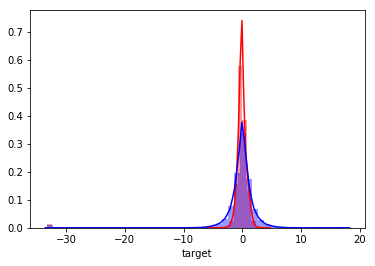

In [267]:
sns.distplot(xsub_comb['target'], color='r')
sns.distplot(target, color='b')

In [268]:
xsub_comb.to_csv('submission_1.csv', index = False)

In [273]:
df_train['hist_month_nunique'].describe()

count    201917.000000
mean          7.461298
std           3.076440
min           2.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: hist_month_nunique, dtype: float64